In [102]:
library(ggplot2)
library(purrr)
library(stringr)
df <- read.csv("internal-control-experiments.csv")
df$variable=as.factor(map_chr(df$variable,function(s) str_replace_all(s, "\\(DownstreamCmdID [a-z-0-9]*.", "")))
df$type=as.numeric(df$value)
df$time=ts(df$time)
df$iteration=factor(df$iteration)
print(unique(df$variable))

 [1] sensor-RaplKey (PackageID 0)  sensor-DownstreamCmdKey      
 [3] actionType                    RaplKey (PackageID 0)(action)
 [5] 6e-05-probability             6e-05-cumulativeLoss         
 [7] 7.5e-05-probability           7.5e-05-cumulativeLoss       
 [9] 0.0001-probability            0.0001-cumulativeLoss        
[11] 0.00011-probability           0.00011-cumulativeLoss       
[13] 0.00012-probability           0.00012-cumulativeLoss       
[15] 0.00015-probability           0.00015-cumulativeLoss       
[17] 0.00018-probability           0.00018-cumulativeLoss       
[19] 0.00021-probability           0.00021-cumulativeLoss       
[21] constraint-0                  objective-0                  
[23] loss                         
23 Levels: 0.0001-cumulativeLoss 0.0001-probability ... sensor-RaplKey (PackageID 0)


In [103]:
df_control=df[which(df["name"]=="controlOn"),]
df_maxP=df_control=df[which(df["name"]=="pcap210"),]
df_maxP$value=as.numeric(df_maxP$value)

summary(df_maxP)

       X             time                               variable 
 Min.   : 0.0   Min.   :  1.0   sensor-DownstreamCmdKey     :22  
 1st Qu.: 5.0   1st Qu.: 34.0   sensor-RaplKey (PackageID 0):22  
 Median :10.5   Median : 88.5   0.0001-cumulativeLoss       : 0  
 Mean   :10.5   Mean   : 85.5   0.0001-probability          : 0  
 3rd Qu.:16.0   3rd Qu.:135.0   0.00011-cumulativeLoss      : 0  
 Max.   :21.0   Max.   :171.0   0.00011-probability         : 0  
                                (Other)                     : 0  
     value        iteration        name         type       
 Min.   :  1.00   0:22      pcap210  :44   Min.   :  1.00  
 1st Qu.:  1.00   1:22      controlOn: 0   1st Qu.:  1.00  
 Median :  1.50             pcap100  : 0   Median :  1.50  
 Mean   : 52.25             pcap110  : 0   Mean   : 52.25  
 3rd Qu.: 78.75             pcap120  : 0   3rd Qu.: 78.75  
 Max.   :237.00             pcap150  : 0   Max.   :237.00  
                            (Other)  : 0            

In [106]:
p <- ggplot(df_maxP, aes(time,value,group=iteration,color=iteration)) + geom_line() + facet_grid(rows = vars(variable))

simpleWarning in if (class(res$value) == "help_files_with_topic") {: the condition has length > 1 and only the first element will be used




simpleWarning in if (class(res$value) == "help_files_with_topic") {: the condition has length > 1 and only the first element will be used




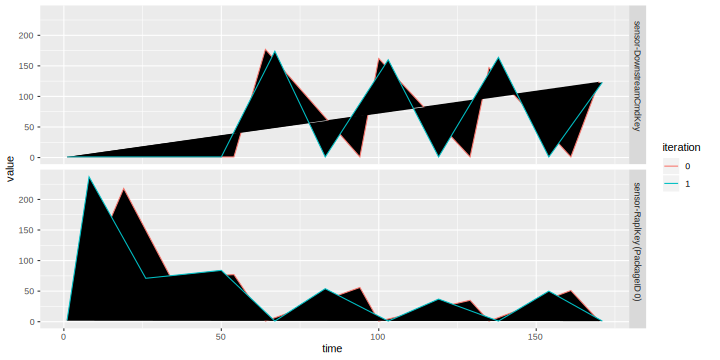

In [107]:
print(p)

In [ ]:
def summary(history, referenceRuntime=None, constraint=1.1):
    t_min, t_max = plot_history(history)
    runtime = t_max - t_min
    powerseries = history["sensor-RaplKey (PackageID 0)"]
    powerMeasurements = [v for t, v in powerseries]
    ts = [t / (1000000 * 3600) for t, v in powerseries]
    energy = integrate.trapz(powerMeasurements, ts)
    print("Runtime: %s " % runtime)
    print("Energy: %s Wh" % energy)
    if referenceRuntime:
        constraintValue = runtime / referenceRuntime
        print("Constraint value: %s" % constraintValue, end=" ")
        if constraintValue > constraint:
            print(".. breached.")
        else:
            print(".. respected")
    return (runtime, energy)

